[*********************100%%**********************]  1 of 1 completed


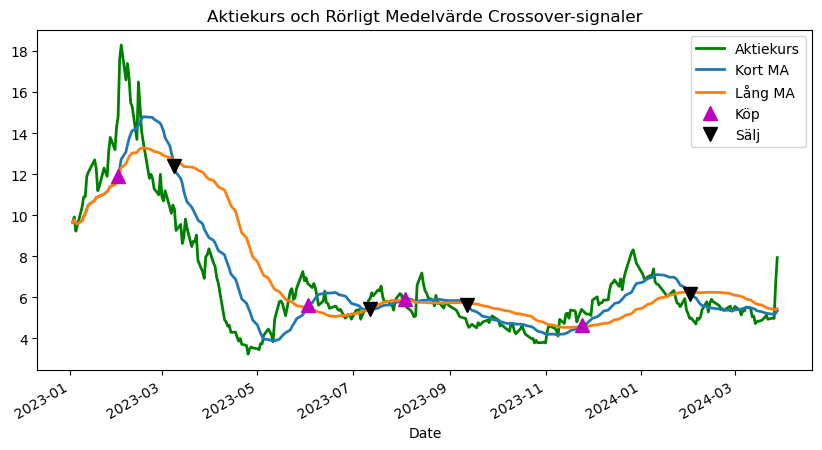

In [3]:
import yfinance as yf
import numpy as np  # Säkerställer att numpy är importerat
import pandas as pd
import matplotlib.pyplot as plt

def fetch_data(ticker, start_date='2023-01-01', end_date='2024-04-01'):
    """
    Hämtar historiska aktiedata från Yahoo Finance.

    Parametrar:
    ticker (str): Aktiesymbol.
    start_date (str): Startdatum för data i formatet 'YYYY-MM-DD'.
    end_date (str): Slutdatum för data i formatet 'YYYY-MM-DD'.

    Returnerar:
    pandas.DataFrame: DataFrame med historiska aktiedata.
    """
    data = yf.download(ticker, start=start_date, end=end_date)
    return data

def moving_average_crossover(data, short_window=20, long_window=50):
    """
    Implementerar Rörligt Medelvärde Crossover-strategin.

    Parametrar:
    data (pandas.DataFrame): DataFrame med historiska aktiedata.
    short_window (int): Tidsperiod för det korta rörliga medelvärdet.
    long_window (int): Tidsperiod för det långa rörliga medelvärdet.

    Returnerar:
    signals (pandas.DataFrame): DataFrame med köp- och säljsignaler.
    """
    signals = pd.DataFrame(index=data.index)
    signals['signal'] = 0.0

    # Beräknar det korta och långa rörliga medelvärdet
    signals['short_mavg'] = data['Close'].rolling(window=short_window, min_periods=1).mean()
    signals['long_mavg'] = data['Close'].rolling(window=long_window, min_periods=1).mean()

    # Skapar signaler
    signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] 
                                                > signals['long_mavg'][short_window:], 1.0, 0.0)   

    # Genererar handelssignaler
    signals['positions'] = signals['signal'].diff()

    return signals

def plot_signals(data, signals):
    """
    Plottar aktiekursen tillsammans med köp- och säljsignalerna.

    Parametrar:
    data (pandas.DataFrame): DataFrame med historiska aktiedata.
    signals (pandas.DataFrame): DataFrame med köp- och säljsignaler.
    """
    # Initierar plotten
    fig, ax = plt.subplots(figsize=(10,5))

    # Plottar aktiekursen
    data['Close'].plot(ax=ax, color='g', lw=2.)

    # Plottar rörliga medelvärden
    signals[['short_mavg', 'long_mavg']].plot(ax=ax, lw=2.)

    # Plottar köp-signaler
    ax.plot(signals.loc[signals.positions == 1.0].index, 
             signals.short_mavg[signals.positions == 1.0],
             '^', markersize=10, color='m')
    
    # Plottar sälj-signaler
    ax.plot(signals.loc[signals.positions == -1.0].index, 
             signals.short_mavg[signals.positions == -1.0],
             'v', markersize=10, color='k')

    plt.title('Aktiekurs och Rörligt Medelvärde Crossover-signaler')
    plt.legend(['Aktiekurs', 'Kort MA', 'Lång MA', 'Köp', 'Sälj'])
    plt.show()

# Exempelanvändning:
ticker = 'OUST'  # Ändra till önskad aktiesymbol
data = fetch_data(ticker)
signals = moving_average_crossover(data)
plot_signals(data, signals)
